 # Principal component analysis
 PCA is used to reduce the dimensions of a very large dataset by converting it into some principal components (features) which are less than original number of features.
 
 Principal components are formed such that they take into account the maximum data trends, they do so by maximizing the variance around themselves.
 
 One way to form PCs is to use eigenvectors and eigenvalues of the covariance matrix.  
 ## Eigenvectors
 When a vector is transformed using a transformation matrices then all the vectors who remain in their span, i.e., who don't change their direction are called eigenvectors. 
 ## Eigenvalues
 The amount by which the eigenvalue vectors shrink or expand is the eigenvalue
 
Following equation is used to compute eigen values:

 A·v̅ = λ·v̅

 (A-λ.Id)·v̅ = 0

 A : Transformation matrix

 v̅  : eigenvector

 λ : eigenvalue

 Id: Identity matrix


**To find a PCs follow the steps below:**
1. Find mean of all features
2. Shift all features by subracting mean
3. Find covariance matrix
4. Using the above covariance matrix find the eigenvectors and eigenvalues
5. Sort the eigenvalues and use the highest 'k' eigenvalues to find 'k' eigenvectors which are the 'k' PCs
6. Project the original data along new eigenvectors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

## Load dataset

In [2]:
df = load_iris().data[:,:3]

### Plot data

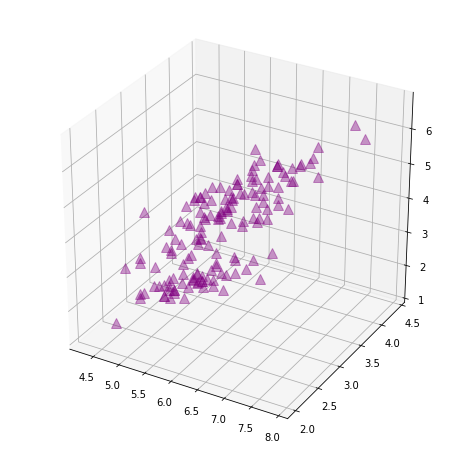

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(df[:,0], df[:,1], df[:,2], '^', markersize=10, color='purple', alpha=0.4)
plt.show()

### Subract mean

In [4]:
df = df - df.mean(axis=0)

### Plot again
Subracting mean shall not change the relative position of points, only observable change shall be in the axes range

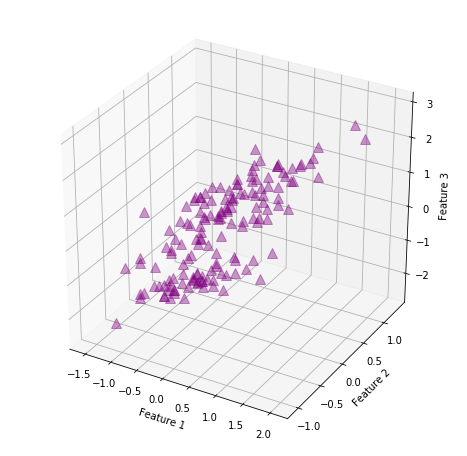

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(df[:,0], df[:,1], df[:,2], '^', markersize=10, color='purple', alpha=0.4)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

### Calculate covariance matrix

In [6]:
cov_matrix = np.cov(df.T)
cov_matrix.shape

(3, 3)

In [7]:
evalues, evectors  = np.linalg.eig(cov_matrix)

In [8]:
pd.DataFrame(evalues).head()

,0
0,3.691120
1,0.059454
2,0.241377


In [9]:
remove_val = evalues.argmin() #we want to reduce dimension so we will remove the PC with least variance (corresponds to least eigenvalue)

In [10]:
evectors = np.delete(evectors, remove_val, axis=1)
pca_transformed_data = evectors.T.dot(df.T).T

### Plot transformed data

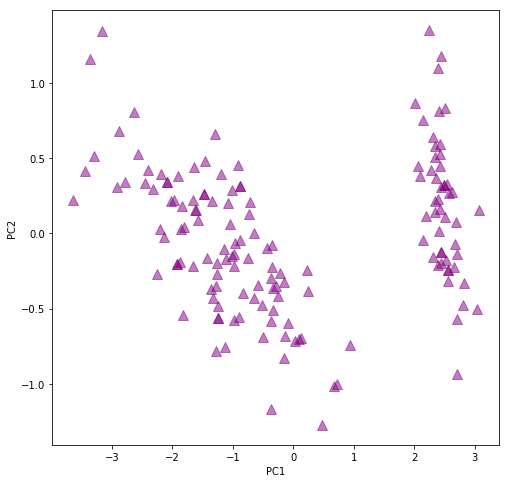

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.plot(pca_transformed_data[:,0], pca_transformed_data[:,1], '^', markersize=10, color='purple', alpha=0.5)
plt.show()

# Sklearn PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(2)
pca.fit(df)
sklearn_pca_transformed = pca.transform(df)

### Plot data after PCA

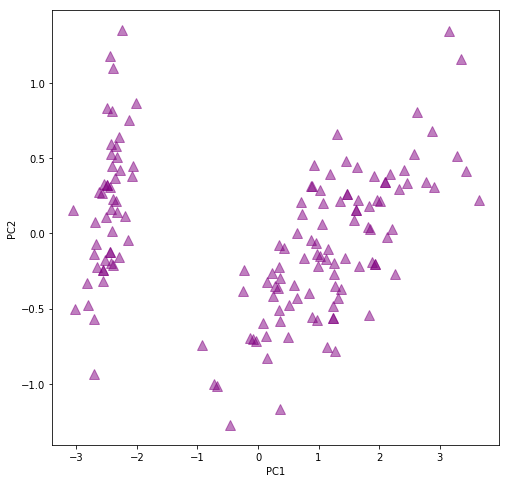

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   
ax.plot(sklearn_pca_transformed[:,0], sklearn_pca_transformed[:,1], '^', markersize=10, color='purple', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()